<a href="https://colab.research.google.com/github/J-Rakesh-Naidu/Dogs_vs_Cats_Classifier/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:11<00:00, 126MB/s] 
100% 1.06G/1.06G [00:11<00:00, 98.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_set = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

val_set = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_set = train_set.map(process)
val_set = val_set.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),)
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),)
model.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(256,256,3)),)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,epochs=10,validation_data=val_set)

Epoch 1/10
625/625 [==============================] - 78s 107ms/step - loss: 1.0670 - accuracy: 0.6218 - val_loss: 0.6009 - val_accuracy: 0.6790
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5493 - accuracy: 0.7262 - val_loss: 0.5902 - val_accuracy: 0.7278
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4746 - accuracy: 0.7776 - val_loss: 0.4750 - val_accuracy: 0.7840
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4003 - accuracy: 0.8189 - val_loss: 0.4433 - val_accuracy: 0.7962
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3489 - accuracy: 0.8493 - val_loss: 1.6803 - val_accuracy: 0.5394
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2752 - accuracy: 0.8856 - val_loss: 0.4822 - val_accuracy: 0.8112
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1894 - accuracy: 0.9229 - val_loss: 1.4618 - val_ac

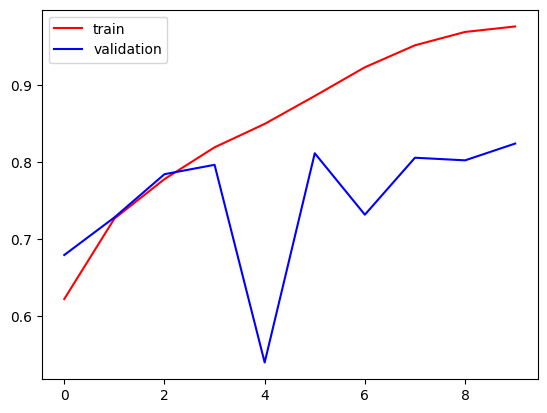

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy' ],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

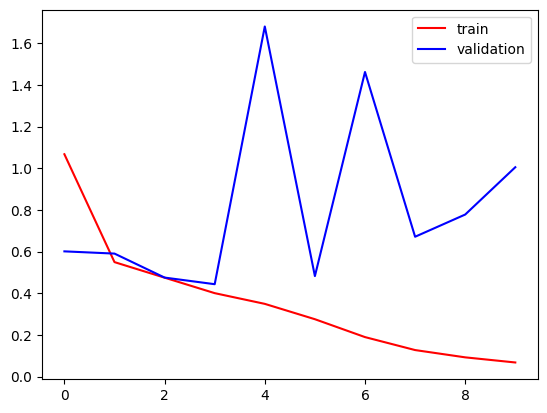

In [ ]:
plt.plot(history.history['loss' ],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()